In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2

In [21]:
# reading radiographs from dataset
# import os

# # create a blank figure

# train_img = {}
# for dirname, _, filenames in os.walk('./fracture/training'):
#     # os.walk is used to loop through the dataset
#     for filename in filenames:
#         img1=Image.open(os.path.join(dirname,filename)).convert('RGB')
#         index=os.path.splitext(filename)[0]
#         train_img[index]=img1


# plt.imshow(train_img['3'])
# imshow shows the images

In [57]:
img = cv2.imread("./fracture/training/1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray,70,100)
images = [gray,canny]

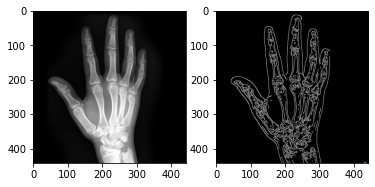

In [58]:
for i in range(2):
    plt.subplot(1,2,i+1),
    plt.imshow(images[i],'gray')
    
plt.show()

In [59]:
# canny_copy = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
# canny_copy = np.copy(canny_copy)

In [60]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 150)
# lines = cv2.HoughLinesP(canny, 1, np.pi / 180, 100,minLineLength=100,maxLineGap=10)
# print(lines)

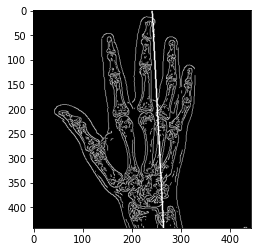

In [61]:
# Houghlines

if lines is not None:
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(canny, (x1,y1), (x2,y2), (255,255,255), 2)
#             pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#             pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

plt.imshow(canny,'gray')
k = cv2.waitKey(0)

# plt.show()

In [33]:
# for line in lines:
#     x1,y1,x2,y2 = line[0]
#     cv2.line(canny,(x1,y1),(x2,y2),(255,255,255),2)

# plt.imshow(canny,'gray')
# k = cv2.waitKey(0)